## Task 2 Machine Learning with Matrix Data for Recommender Systems

- Recommenders are a hot topic. Recommendation systems can be formulated as a task of matrix completion in machine learning. Recommender systems aim to predict the rating that a user will give for an item. (e.g. restaurant, a movie, a product)
- Download the movie rating dataset from: https://www.kaggle.com/rounakbanik/the-movies-dataset. These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages. The dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website. 
- Building a small recommender system with the matrix data. "ratings small.csv" You can use the recommender system library: Surprise(http://surpriselib.com), use other recommender system libraries, or implement from scratch.


- Read data from "ratings_small.csv" with line format: 'userId movieID rating timestamp'
- MAE and RMSE are two famous metrics for evaluating the performances of a recommender system. The definition of MAE can be found via: https://en.wikipedia.org/wiki/Mean_absolute_error. The definition of RMSE can be found via: https://en.wikipedia.org/wiki/Root-mean-square_deviation. 
- Compute the average MAE and RMSE of the probabilistic Matrix factorization(PMF), User based Collaborative Filtering, Item based collaborative filtering, under the 5-folds cross-validation. 
- Compare the average(mean) performances of the user-based collaborative filtering, item-based collaborative filtering, PMF with respect to the RMSE and MAE. Which ML model is the best in the movie rating data?
- Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results.
- Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE. Is the best K of User based Collaborative Filtering the same with the best K of item based collaborative filtering?


In [1]:
import os
import pandas as pd
import numpy as np
from surprise import *
from surprise.model_selection import *
import logging
import matplotlib.pyplot as plt
# logging.getLogger('surprise').setLevel(logging.ERROR)

In [2]:
ratings_file = 'ratings_small.csv'
df = pd.read_csv(ratings_file)
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
reader = Reader(rating_scale=(df['rating'].min(), df['rating'].max()))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [4]:
trainset, testset = train_test_split(data, test_size=0.20)
print(reader.rating_scale)

(0.5, 5.0)


In [5]:
user_based = KNNBasic(user_based= True) 
item_based = KNNBasic(user_based= False)
pmf = SVD()

In [6]:
metrics = ['rmse', 'mae']
user_based_results = cross_validate(user_based, data, measures=metrics, cv=5, verbose=True)
item_based_results = cross_validate(item_based, data, measures=metrics, cv=5, verbose=True)
pmf_results = cross_validate(pmf, data, measures=metrics, cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9644  0.9670  0.9796  0.9742  0.9590  0.9689  0.0073  
MAE (testset)     0.7390  0.7454  0.7538  0.7466  0.7371  0.7444  0.0059  
Fit time          0.07    0.08    0.08    0.08    0.08    0.08    0.01    
Test time         0.93    0.98    0.94    0.99    0.93    0.95    0.03    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [7]:
print('User-based CF RMSE:', user_based_results['test_rmse'].mean())
print('User-based CF MAE:', user_based_results['test_mae'].mean())
print('*'*20)
print('Item-based CF RMSE:', item_based_results['test_rmse'].mean())
print('Item-based CF MAE:', item_based_results['test_mae'].mean())
print('*'*20)
print('PMF RMSE:', pmf_results['test_rmse'].mean())
print('PMF MAE:', pmf_results['test_mae'].mean())

User-based CF RMSE: 0.9688546301913423
User-based CF MAE: 0.7443836717382709
********************
Item-based CF RMSE: 0.9686661838354595
Item-based CF MAE: 0.7441750556330707
********************
PMF RMSE: 0.8965393585486259
PMF MAE: 0.6897142960354993


#### Lower MAE and RMSE indicate better model performance. Therefore, Item-based CF has lowest MAE and lowest RMSE compared to other two methods. Thus, we can claim it performs better predictions based on the dataset

In [8]:
user_based_cosine = KNNBasic(user_based= True, name= 'cosine')
user_based_msd = KNNBasic(user_based= True, name= 'msd')
user_based_pearson = KNNBasic(user_based= True, name= 'pearson')

item_based_cosine = KNNBasic(user_based= False, name= 'cosine')
item_based_msd = KNNBasic(user_based= False, name= 'msd')
item_based_pearson = KNNBasic(user_based= False, name= 'pearson')


In [9]:
user_based_cosine_results = cross_validate(user_based_cosine, data, measures=metrics, cv=5)
user_based_msd_results = cross_validate(user_based_msd, data, measures=metrics, cv=5)
user_based_pearson_results = cross_validate(user_based_pearson, data, measures=metrics, cv=5)

item_based_cosine_results = cross_validate(item_based_cosine, data, measures=metrics, cv=5)
item_based_msd_results = cross_validate(item_based_msd, data, measures=metrics, cv=5)
item_based_pearson_results = cross_validate(item_based_pearson, data, measures=metrics, cv=5)

user_based_scores = [user_based_cosine_results, user_based_msd_results, user_based_pearson_results]
item_based_scores = [item_based_cosine_results, item_based_msd_results, item_based_pearson_results]

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

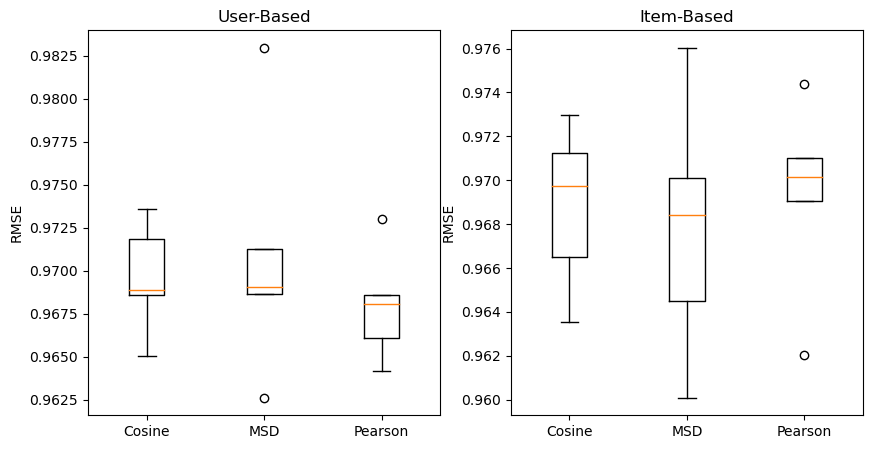

In [10]:
x_labels = ['Cosine', 'MSD', 'Pearson']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot([x['test_rmse'] for x in user_based_scores], labels=x_labels)
plt.title('User-Based')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.boxplot([x['test_rmse'] for x in item_based_scores], labels=x_labels)
plt.title('Item-Based')
plt.ylabel('RMSE')


plt.show()

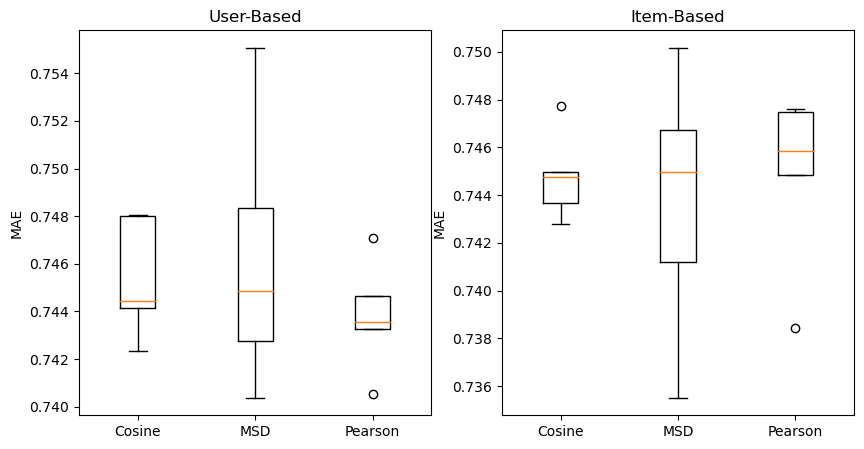

In [11]:
# MAE plots
x_labels = ['Cosine', 'MSD', 'Pearson']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot([x['test_mae'] for x in user_based_scores], labels=x_labels)
plt.title('User-Based')
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
plt.boxplot([x['test_mae'] for x in item_based_scores], labels=x_labels)
plt.title('Item-Based')
plt.ylabel('MAE')

plt.show()

In [18]:
user_k_results = []
item_k_results = []

for k in range(1, 50):
    user_based = KNNWithMeans(user_based= True,k=k)
    item_based = KNNWithMeans(user_based= False, k=k) 
    
    user_results = cross_validate(user_based, data, measures=['rmse'], cv=5)
    item_results = cross_validate(item_based, data, measures=['rmse'], cv=5)
    
    user_k_results.append(user_results['test_rmse'].mean())
    item_k_results.append(item_results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

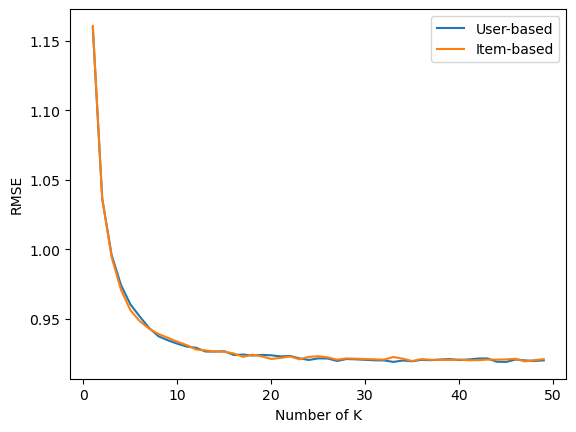

In [19]:
plt.plot(range(1, 50), user_k_results, label='User-based')
plt.plot(range(1, 50), item_k_results, label='Item-based')
plt.xlabel('Number of K')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [20]:
best_user_k = user_k_results.index(min(user_k_results)) + 1
best_item_k = item_k_results.index(min(item_k_results)) + 1
print("user-based CF - best K:  {0}, score: {1}".format(best_user_k, min(user_k_results)))
print("item-based CF - best K:  {0}, score: {1}".format(best_item_k, min(item_k_results)))

user-based CF - best K:  33, score: 0.918705424207128
item-based CF - best K:  47, score: 0.9191024574537785
